In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation

In [16]:
data = data.drop(['Date'],axis=1)

In [18]:
correlation = data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

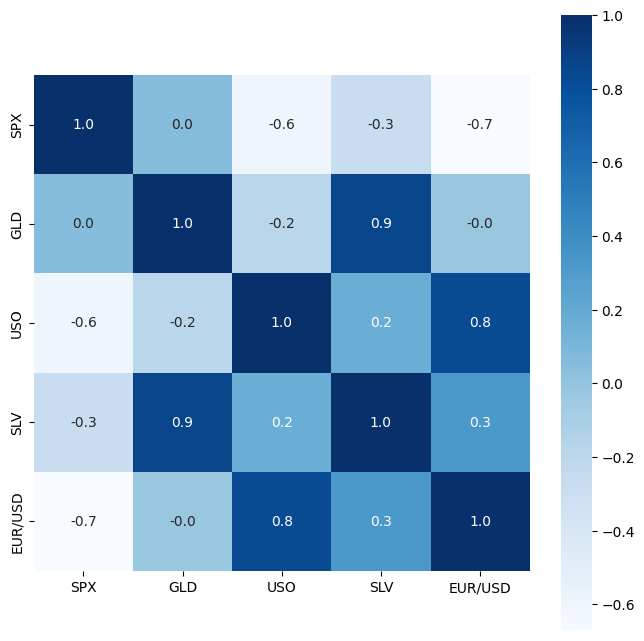

In [22]:
# construct a heatmap to understand the ccorrelation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [23]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/qj/_xr448610yg3dn_k91tss4s80000gn/T/ipykernel_15814/3224253248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

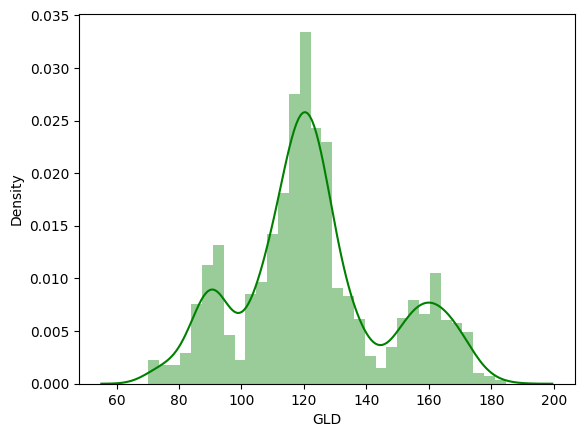

In [30]:
sns.distplot(data['GLD'],color='green')

In [32]:
X = data.drop('GLD', axis=1)
y = data['GLD']

In [60]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
y_test

2178    122.320000
1271    129.899994
1268    126.980003
44       96.500000
2025    117.580002
           ...    
993     152.149994
2175    121.309998
1057    162.600006
1064    167.100006
261      94.349998
Name: GLD, Length: 687, dtype: float64

## Training the Model

In [75]:
model = RandomForestRegressor(n_estimators=100)

In [76]:
model.fit(X_train, y_train)

RandomForestRegressor()

## Prediction

In [77]:
predictions = model.predict(X_test)
predictions

array([122.60199974, 129.80090284, 127.61229993,  97.75969901,
       119.12860041, 114.59269925, 124.82870145, 117.84519966,
       107.8862011 ,  98.44329974,  95.75299989, 167.7232979 ,
       148.322901  , 115.85760034, 170.77180151,  85.07489957,
       124.22279909, 108.80349724, 112.03320075, 131.61540309,
       124.13379968, 113.47420059, 115.75190056, 108.80999955,
       107.97719982, 125.86169978, 119.76629996, 112.65519878,
       113.33590178, 126.54949922, 146.29980195,  89.27969987,
       167.60769942, 113.56079921, 108.22050093, 120.19360085,
       141.10399795, 161.42490197, 173.79579892, 153.13540163,
       119.53920071, 111.31970064, 121.37189978, 113.61869932,
       122.13320016, 107.85470058,  88.14829874, 114.32369919,
       129.65390266, 117.83170115, 104.51009982, 129.43630286,
       107.303598  , 161.29080521, 131.51270074, 117.11759954,
       147.79469982, 136.8055014 ,  95.72520075, 124.83710114,
       114.88919944,  86.48990116, 104.3043991 , 114.01

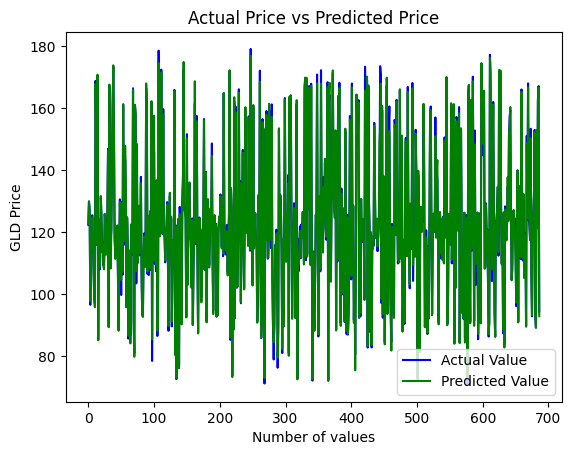

In [78]:
plt.plot(list(y_test), color='blue', label = 'Actual Value')
plt.plot(predictions, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

In [79]:
print('R Mean Squared Error: ', r2_score(y_test, predictions))

print('Mean absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, predictions)))


R Mean Squared Error:  0.9909452829444335
Mean absolute Error:  1.3169352673362495
Mean Squared Error:  4.989261379669228
Root Mean Squared Error:  2.233665458314926
